In [83]:
import pandas as pd
import seaborn as sns

In [84]:
# Importando base e fazendo primeira visualização
varejo = pd.read_excel("/content/varejo.xlsx")
varejo.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [85]:
# verificando os dtypes e dados não nulos
varejo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [86]:
# verificando os canais de venda
# APP = Aplicativo !
varejo.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [87]:
# Substituindo e fazendo a visualização novamente
varejo["idcanalvenda"] = varejo["idcanalvenda"].str.replace("APP", "Aplicativo")
varejo.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [88]:
# Verificando as bandeiras
varejo.groupby("bandeira").idcompra.nunique()

bandeira
A    27679
B    38483
Name: idcompra, dtype: int64

In [89]:
# Verificando os departamentos
varejo.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios e Inovacoes     3548
Alimentos                     2
Ar e Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza e Saude             4626
Brinquedos                 1320
Cama, Mesa e Banho          153
Casa e Construcao           263
Cine e Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte e Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos Musicais         1
Linha Industrial             86
Malas e Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet Shop                     43
Produtos de Limpeza         713
Relogios                    134
TV e Video                    5
TVs e Acessorios           5326
Tablets                    1770
Telefones e Celulares 

In [90]:
# Verificando os estados
varejo.groupby("estado").idcompra.nunique()

estado
AC       10
AL      461
AM       15
AP        3
BA     2028
CE     1007
DF     1902
ES     1254
GO     1603
MA      129
MG    10538
MT      510
PA      108
PB      536
PE     1632
PI      247
PR     2754
RJ    16213
RN      463
RO       15
RR        7
RS     4099
SC     1932
SE      340
SP    25962
TO      101
Name: idcompra, dtype: int64

In [91]:
# Substituindo valores nulos, trazendo os estados nulos como MG, que foi dado com premissa e trazendo os preços nulos com valor do preço médio
varejo["estado"].fillna("MS", inplace = True)
medPreco = varejo["Preço"].median()
varejo["Preço"].fillna(medPreco, inplace = True)
varejo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [92]:
varejo = varejo.query("Preço < Preço_com_frete")
varejo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22082 entries, 2 to 80194
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           22082 non-null  int64         
 1   idcanalvenda       22082 non-null  object        
 2   bandeira           22082 non-null  object        
 3   Data               22082 non-null  datetime64[ns]
 4   Preço              22082 non-null  float64       
 5   Preço_com_frete    22082 non-null  float64       
 6   Nome_Departamento  22082 non-null  object        
 7   estado             22082 non-null  object        
 8   cliente_Log        22082 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.7+ MB


In [93]:
#Respondendo uma das premeiras questões de negócio
varejo.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False)

Nome_Departamento
Bebes                     4353
Eletrodomesticos          4206
Eletroportateis           2224
Moveis                    2043
Utilidades Domesticas     1366
Acessorios e Inovacoes    1243
Beleza e Saude            1054
Brinquedos                 687
Perfumaria                 563
Produtos de Limpeza        522
Telefones e Celulares      507
Automotivo                 458
Esporte e Lazer            446
Audio                      376
Ar e Ventilacao            337
Ferramentas                287
Informatica                286
Games                      200
TVs e Acessorios           158
Decoracao                  127
Malas e Mochilas            91
Cama, Mesa e Banho          71
Tablets                     66
Casa e Construcao           58
Relogios                    45
Pet Shop                    40
Linha Industrial             9
Cine e Foto                  8
Moda                         3
Alimentos                    2
Instrumentos Musicais        1
Name: idcompra, dtype

In [128]:
#Respondendo segunda métrica de negócio
agg_dept = varejo.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index()

In [124]:
#Responde mais uma métrica
vendas_data = varejo.groupby("Data").idcompra.nunique().reset_index()

In [96]:
varejo["mes"] = varejo["Data"].dt.month
varejo.groupby("mes").idcompra.nunique()

<ipython-input-96-f266ab33ff11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  varejo["mes"] = varejo["Data"].dt.month


mes
1    5317
2    5143
3    5602
4    5462
Name: idcompra, dtype: int64

In [97]:
cliente = pd.read_excel("/content/cliente_varejo.xlsx")
cliente = cliente.astype({"renda":"float"})
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [98]:
varejo_cliente = varejo.merge(cliente, how="left", on="cliente_Log")
varejo_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


In [114]:
# Renda média por canal de vendas
agg_canal_renda = round(varejo_cliente.groupby("idcanalvenda")["renda"].agg("mean"),2).reset_index()
agg_canal_renda

,idcanalvenda,renda
0,Aplicativo,8245.18
1,Internet,8211.62
2,Mobile,8223.75


In [109]:
agg_idade_bandeira = varejo_cliente.groupby("bandeira")["idade"].agg("mean").reset_index()
agg_idade_bandeira

,bandeira,idade
0,A,53.306050
1,B,53.291558


In [101]:
import matplotlib.pyplot as plt


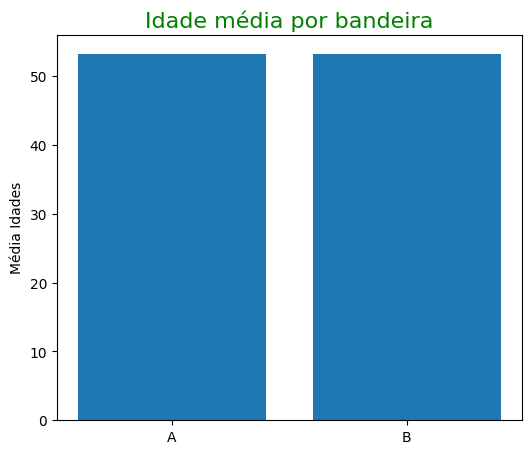

In [112]:
fig = plt.figure(figsize =(6,5))
plt.bar(agg_idade_bandeira["bandeira"], agg_idade_bandeira["idade"])
plt.ylabel("Média Idades")
plt.title("Idade média por bandeira", fontsize = 16, color="green");

Text(0.5, 1.0, 'Média de renda por canal de venda')

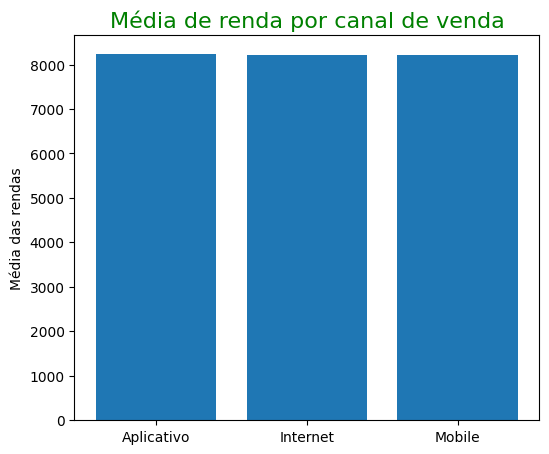

In [115]:
fig = plt.figure(figsize = (6,5))
plt.bar(agg_canal_renda["idcanalvenda"], agg_canal_renda["renda"])
plt.ylabel("Média das rendas")
plt.title("Média de renda por canal de venda", fontsize=16, color ="green")

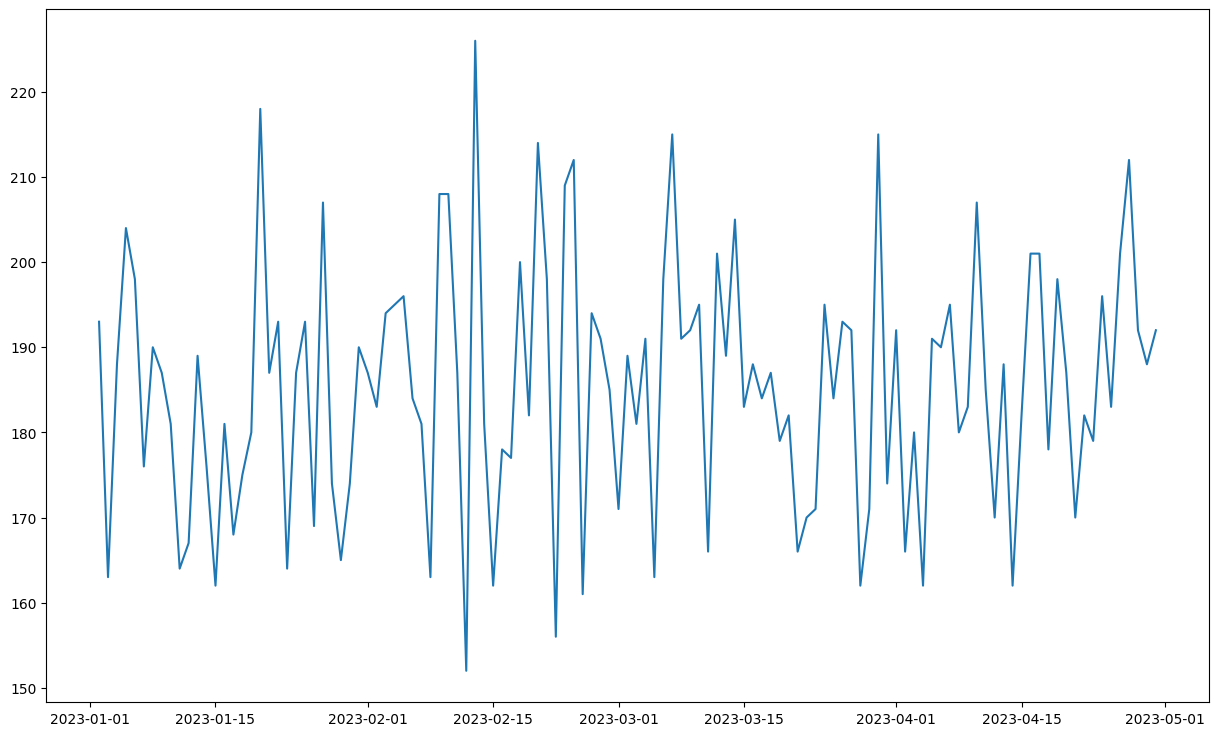

In [126]:
fig = plt.figure(figsize = (15,9))
plt.plot(vendas_data["Data"], vendas_data["idcompra"]);

varejo.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index()

(-1.94, 10.0)

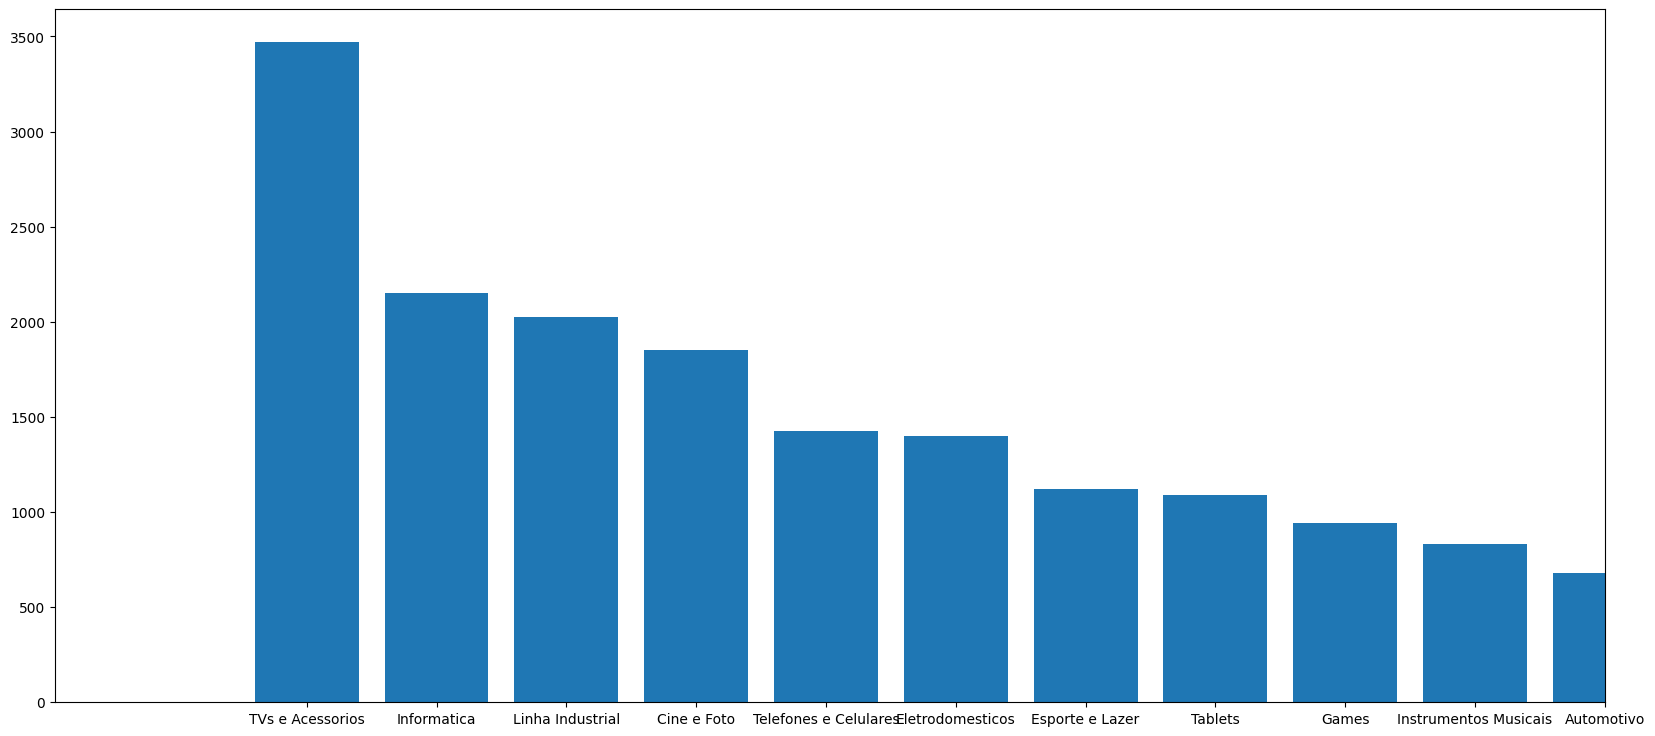

In [138]:
fig = plt.figure(figsize = (20,9))
plt.bar(agg_dept['Nome_Departamento'],agg_dept['Preço_com_frete'])
plt.xlim(right = 10)

In [139]:
%pip install plotly

In [140]:
%pip install cufflinks
%pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.2 MB/s eta 0:00:00


In [145]:
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

In [146]:
px.bar(agg_idade_bandeira, x = "bandeira", y = "idade")

In [147]:
px.line(vendas_data, x = "Data", y = "idcompra")

In [151]:
px.bar(agg_dept, x = "Nome_Departamento", y ="Preço_com_frete")